**import important liberaries**

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**import data csv file**

In [45]:
path ="Housing.csv"
df = pd.read_csv(path)

**Display The Data**

In [46]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [47]:
df.shape

(545, 13)

In [48]:
#making price our target column
cols = df.columns.tolist()
cols.append(cols.pop(cols.index("price")))
df = df[cols]
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


**Check for data types**

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              545 non-null    int64 
 1   bedrooms          545 non-null    int64 
 2   bathrooms         545 non-null    int64 
 3   stories           545 non-null    int64 
 4   mainroad          545 non-null    object
 5   guestroom         545 non-null    object
 6   basement          545 non-null    object
 7   hotwaterheating   545 non-null    object
 8   airconditioning   545 non-null    object
 9   parking           545 non-null    int64 
 10  prefarea          545 non-null    object
 11  furnishingstatus  545 non-null    object
 12  price             545 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


**check for unique values**

In [50]:
pd.DataFrame([df.nunique(),df.dtypes],index = ["unique_values","dtype"])

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
unique_values,284,6,4,4,2,2,2,2,2,4,2,3,219
dtype,int64,int64,int64,int64,object,object,object,object,object,int64,object,object,int64


**converting object datatype to category**

In [51]:
cols = "bedrooms bathrooms stories parking mainroad guestroom basement hotwaterheating airconditioning prefarea furnishingstatus".split(" ")
df[cols]=df[cols].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   area              545 non-null    int64   
 1   bedrooms          545 non-null    category
 2   bathrooms         545 non-null    category
 3   stories           545 non-null    category
 4   mainroad          545 non-null    category
 5   guestroom         545 non-null    category
 6   basement          545 non-null    category
 7   hotwaterheating   545 non-null    category
 8   airconditioning   545 non-null    category
 9   parking           545 non-null    category
 10  prefarea          545 non-null    category
 11  furnishingstatus  545 non-null    category
 12  price             545 non-null    int64   
dtypes: category(11), int64(2)
memory usage: 16.2 KB


**check for null values**

In [52]:
df.isnull().sum() #There are no null values

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64

**Check for duplicates**

In [53]:
df.duplicated().sum() #there are no duplicated values

0

**Statics About Data**

In [54]:
#first Numerical Data 
df.describe()

,area,price
count,545.000000,5.450000e+02
mean,5150.541284,4.766729e+06
std,2170.141023,1.870440e+06
min,1650.000000,1.750000e+06
25%,3600.000000,3.430000e+06
50%,4600.000000,4.340000e+06
75%,6360.000000,5.740000e+06
max,16200.000000,1.330000e+07


In [55]:
#second categorical data
df.describe(include="category")

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,545,545,545,545,545,545,545,545,545,545,545
unique,6,4,4,2,2,2,2,2,4,2,3
top,3,1,2,yes,no,no,no,no,0,no,semi-furnished
freq,300,401,238,468,448,354,520,373,299,417,227


**Visulaizing The Data**

In [56]:
numeric_df = df.select_dtypes(include="number")
numeric_df

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000
...,...,...
540,3000,1820000
541,2400,1767150
542,3620,1750000
543,2910,1750000


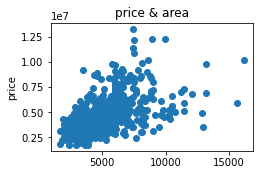

In [57]:
plt.figure(figsize=(8,8))
for i,col in enumerate(numeric_df.columns[:-1]):
    plt.subplot(3,2,i+1)
    plt.scatter(df[col],df["price"])
    plt.ylabel("price")
    plt.title(f"price & {col}")
plt.show()

In [58]:
#correlation matrix to get the relation bet input & output
corr =numeric_df.corr()
corr

,area,price
area,1.000000,0.535997
price,0.535997,1.000000


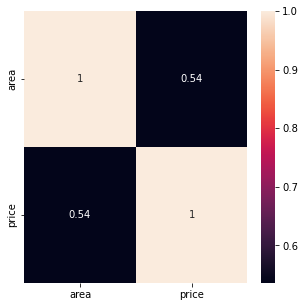

In [59]:
#Visulaizing corr matrix
plt.figure(figsize=(5,5))
sns.heatmap(corr,annot=True)
plt.show()

**Checking for outliers using boxplot**

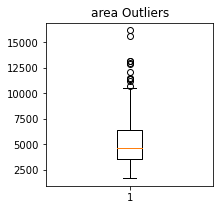

In [60]:
plt.figure(figsize=(3,3))
for i,col in enumerate(numeric_df.columns[:-1]):
    plt.boxplot(df[col])
    plt.title(f"{col} Outliers")
plt.show()

**Dealing With Outliers**

In [61]:
for col in numeric_df.columns[:-1]:
    Q3=df[col].quantile(.75)
    Q1=df[col].quantile(.25)
    IQR=Q3-Q1
    upper_fence=Q3+1.5*IQR
    ind=df[df[col]>np.round(upper_fence)].index
    ratio=1-(df[df[col]<=np.round(upper_fence)].shape[0]/df.shape[0])
    df.loc[ind,col:col]=np.round(upper_fence)
    print(f"Upper fence of {col} is: {upper_fence}")
    print(f"Ration of Outliers {ratio}")
    print(df[col].max())
    print("------------")

Upper fence of area is: 10500.0
Ration of Outliers 0.022018348623853212
10500
------------


**Checking after removing outliers**

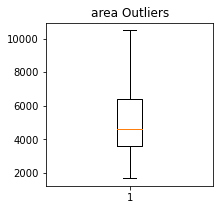

In [62]:
plt.figure(figsize=(3,3))
for i,col in enumerate(numeric_df.columns[:-1]):
    plt.boxplot(df[col])
    plt.title(f"{col} Outliers")
plt.show()

**Visulzing Categorical Data**

In [63]:
categorical_df = df.select_dtypes(include="category")
categorical_df

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,4,4,4,yes,no,no,no,yes,3,no,furnished
2,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...
540,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,3,1,1,no,no,no,no,no,0,no,furnished


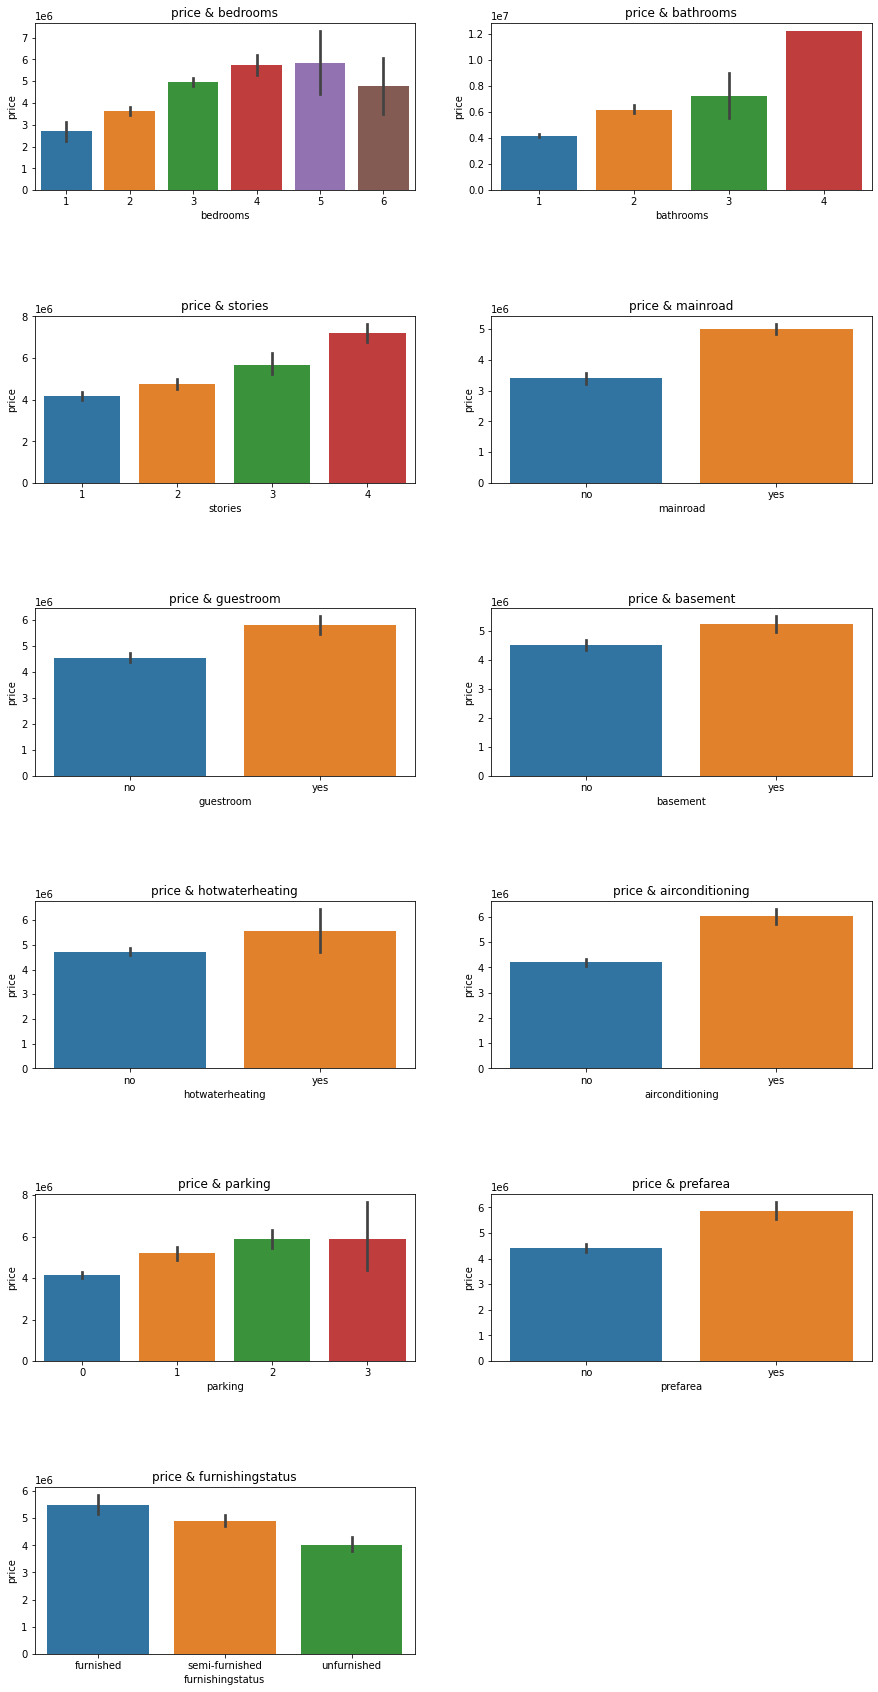

In [64]:
plt.figure(figsize=(15,30))
for i,col in enumerate(categorical_df.columns):
    plt.subplot(6,2,i+1)
    sns.barplot(x = df[col],y = df["price"])
    plt.ylabel("price")
#     plt.xlabel({col})
    plt.title(f"price & {col}")
plt.subplots_adjust(hspace=0.75)
plt.show()

**Split the data**

In [65]:
#split the data into input X & output y
X= df.iloc[:,:-1]
y = df.iloc[:,-1:]
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [66]:
#split the data into train & test using sklearn library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**Normalization**

In [67]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols =X_train.select_dtypes(include="number").columns
numeric_cols

Index(['area'], dtype='object')

In [76]:
X_scalar = MinMaxScaler()
y_scalar = MinMaxScaler()

X_train[numeric_cols] = X_scalar.fit_transform(X_train[numeric_cols])
y_train[["price"]] = y_scalar.fit_transform(y_train[["price"]])

X_test[numeric_cols] = X_scalar.transform(X_test[numeric_cols])
y_test[["price"]] = y_scalar.transform(y_test[["price"]])                                          

**Encoding**

In [82]:
#One hot encoding using get_dummies
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [83]:
X_train 

,area,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_1,bathrooms_2,bathrooms_3,...,airconditioning_yes,parking_0,parking_1,parking_2,parking_3,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
272,0.274011,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
40,0.553672,0,0,1,0,0,0,1,0,0,...,1,1,0,0,0,0,1,1,0,0
326,0.276836,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
441,0.307345,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
511,0.172881,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,1.000000,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
144,0.344633,0,0,0,1,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
72,0.380791,0,0,1,0,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,1
235,0.455367,0,0,1,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0


**Build the model**

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
model = LinearRegression()

**Train The Model**

In [81]:
model.fit(X_train,y_train)

LinearRegression()

## Prediction

In [85]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

## Evaluation

**Return The Data To Original Scale**

In [87]:
y_train = y_scaler.inverse_transform(y_train)
y_test = y_scaler.inverse_transform(y_test)

y_pred_train = y_scaler.inverse_transform(y_pred_train)
y_pred_test = y_scaler.inverse_transform(y_pred_test)

**Evaluating Using mean Square Error**

In [89]:
from sklearn.metrics import mean_absolute_error
train_err = np.round(mean_absolute_error(y_train,y_pred_train))
test_err = np.round(mean_absolute_error(y_test,y_pred_test))
print(train_err)
print(test_err)

0.0
0.0


**Evaluating Using accuracy**

In [94]:
train_acc = (abs(y_pred_train-y_train) < 100).sum() / y_train.shape[0] * 100
test_acc = (abs(y_pred_test - y_test) < 100).sum() /y_test.shape[0] *100
print(train_acc)
print(test_acc)

100.0
100.0
